## Clustering for understanding Online retail

### André de Paula Galhardo

### andregalhardo@tuta.io

dataset: https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel('online_retail_II.xlsx')

In [5]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [6]:
df.size

4203688

In [7]:
df.shape

(525461, 8)

In [8]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### EDA

#### Data Cleaning

In [9]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [10]:
data = df.copy()

In [11]:
data.dropna(axis=0, inplace=True)

In [12]:
data.shape

(417534, 8)

Customer ID is a column in which it is not possible to assign values.

In [13]:
data.duplicated().sum()

6771

As it is a place where products are sold, it is common for there to be duplicate sales by the same consumers and therefore duplicate values will be maintained.

#### Data Exploration

In [19]:
df.Description.value_counts().sum()

522533

In [22]:
df.Description.value_counts().nlargest(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
60 TEATIME FAIRY CAKE CASES           1400
HOME BUILDING BLOCK WORD              1386
JUMBO BAG RED RETROSPOT               1310
LUNCH BAG RED SPOTTY                  1274
REX CASH+CARRY JUMBO SHOPPER          1232
Name: count, dtype: int64

10 best-selling items

In [23]:
df.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [24]:
df.Country.value_counts()

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76


Basically the items are sold within the UK.

In [25]:
df.InvoiceDate.min()

Timestamp('2009-12-01 07:45:00')

In [26]:
df.InvoiceDate.max()

Timestamp('2010-12-09 20:01:00')

The data is between the dates of 2009-12-01 07:45:00 and 2010-12-09 20:01:00.

In [27]:
df.Price.min()

-53594.36

In [28]:
df.Price.max()

25111.09

There are negative values, probably merchandise returns, we will remove these values because it is not in our interest to work with these numbers.

In [29]:
data = data.loc[data['Price'] > 0]

In [30]:
data.Price.min()

0.001

In [31]:
data.Quantity.min()

-9360

There are negative values, probably merchandise returns, we will remove these values because it is not in our interest to work with these numbers.

In [32]:
data = data.loc[data['Quantity'] > 0]

In [33]:
data.Quantity.min()

1

In [34]:
data.size

3261312

### Data Analysis

In [36]:
data['Total'] = data['Quantity'] * data['Price']

In [37]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


<Axes: xlabel='InvoiceDate', ylabel='Total'>

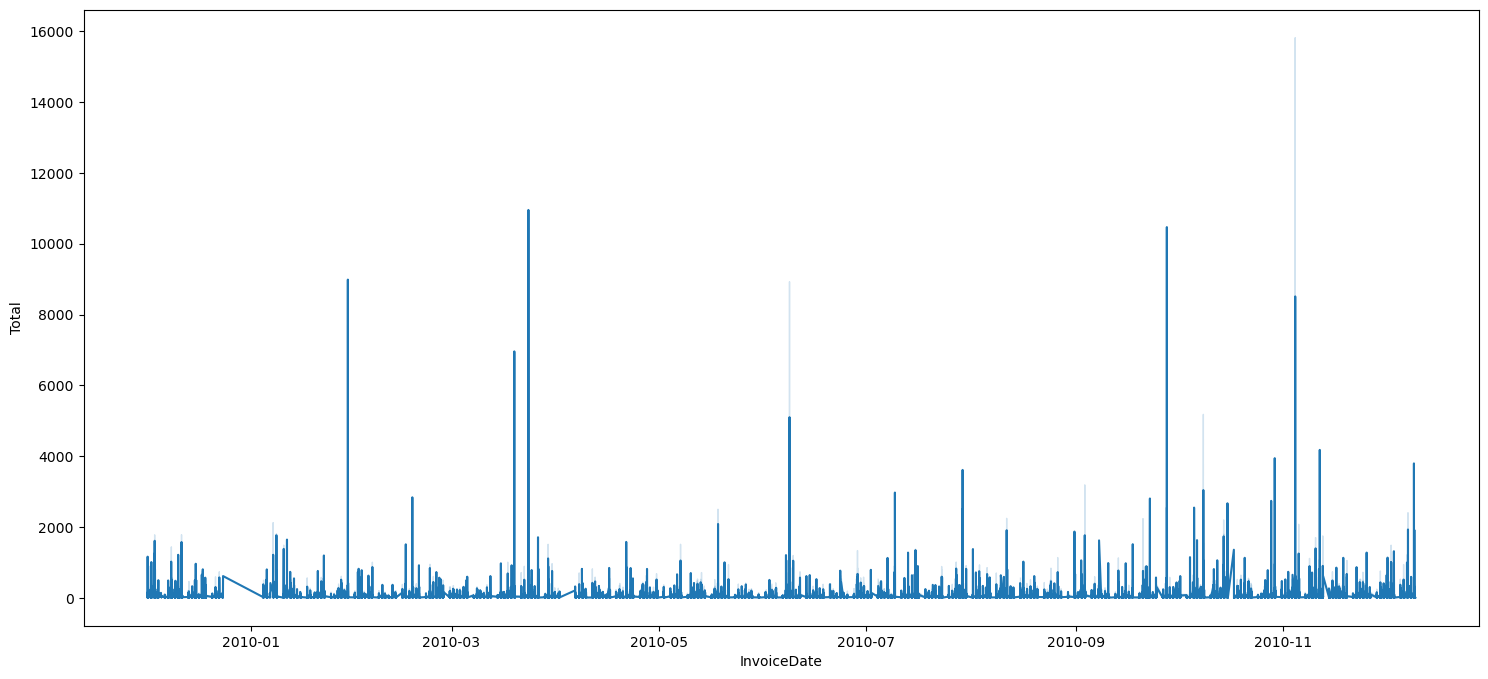

In [39]:
plt.figure(figsize=(18,8))
sns.lineplot(x=data['InvoiceDate'], y=data['Total'])

### Data Modelling 

#### 1 - First Test: Clustering without Dimensionality Reduction and Scaler.

In [52]:
cluster1 = data.groupby('Customer ID').agg({'Total': sum,
                                         'Invoice': lambda x: x.nunique()})

In [53]:
cluster1.head()

,Total,Invoice
Customer ID,,
12346.0,372.86,11
12347.0,1323.32,2
12348.0,222.16,1
12349.0,2671.14,3
12351.0,300.93,1


In [54]:
cluster1['AvgOrder'] = cluster1['Total'] * cluster1['Invoice']

In [55]:
ranked_df = cluster1.rank(method='first')

In [56]:
kmeans = KMeans(n_clusters=3).fit(cluster1)

In [58]:
cluster1['Cluster'] = kmeans.labels_

In [59]:
cluster1.head()

,Total,Invoice,AvgOrder,Cluster
Customer ID,,,,
12346.0,372.86,11,4101.46,0
12347.0,1323.32,2,2646.64,0
12348.0,222.16,1,222.16,0
12349.0,2671.14,3,8013.42,0
12351.0,300.93,1,300.93,0


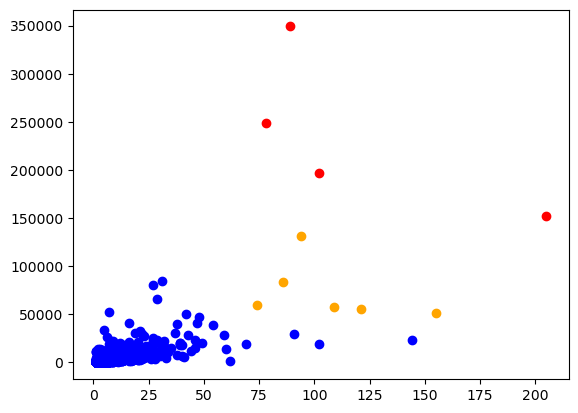

In [78]:
plt.scatter(
cluster1.loc[cluster1['Cluster'] == 0]['Invoice'],
cluster1.loc[cluster1['Cluster'] == 0]['Total'],
c='blue'
)
plt.scatter(
cluster1.loc[cluster1['Cluster'] == 1]['Invoice'],
cluster1.loc[cluster1['Cluster'] == 1]['Total'],
c='red'
)
plt.scatter(
cluster1.loc[cluster1['Cluster'] == 2]['Invoice'],
cluster1.loc[cluster1['Cluster'] == 2]['Total'],
c='orange'
)

Model that does not demonstrate the reality of the data, as it did not correctly segment consumers.

#### 2 - Second Test: Clustering without Dimensionality Reduction but with Scaler.

In [65]:
cluster2 = data.groupby('Customer ID').agg({'Total': sum,
                                         'Invoice': lambda x: x.nunique()})

In [66]:
cluster2.head()

,Total,Invoice
Customer ID,,
12346.0,372.86,11
12347.0,1323.32,2
12348.0,222.16,1
12349.0,2671.14,3
12351.0,300.93,1


In [67]:
cluster2['AvgOrder'] = cluster2['Total'] * cluster2['Invoice']

In [68]:
ranked_df = cluster2.rank(method='first')

In [70]:
cluster2_ss = StandardScaler().fit_transform(ranked_df)
cluster2_ss = pd.DataFrame(cluster2_ss)

In [71]:
cluster2_ss.head()

,0,1,2
0,-0.655143,1.463326,0.508127
1,0.614974,-0.591677,0.262298
2,-1.152424,-1.731649,-1.209463
3,1.205446,0.059047,0.860000
4,-0.897758,-1.730846,-1.019869


In [72]:
cluster2_ss.rename(columns={0:'Total', 1:'Invoice', 2:'AvgOrder'}, inplace=True)
cluster2_ss.set_index(ranked_df.index, inplace=True)

In [73]:
cluster2_ss.head()

,Total,Invoice,AvgOrder
Customer ID,,,
12346.0,-0.655143,1.463326,0.508127
12347.0,0.614974,-0.591677,0.262298
12348.0,-1.152424,-1.731649,-1.209463
12349.0,1.205446,0.059047,0.860000
12351.0,-0.897758,-1.730846,-1.019869


In [74]:
kmeans = KMeans(n_clusters=3).fit(cluster2_ss[['Total', 'Invoice', 'AvgOrder']])

In [75]:
cluster2_ss['Cluster'] = kmeans.labels_

In [76]:
cluster2_ss.head()

,Total,Invoice,AvgOrder,Cluster
Customer ID,,,,
12346.0,-0.655143,1.463326,0.508127,0
12347.0,0.614974,-0.591677,0.262298,0
12348.0,-1.152424,-1.731649,-1.209463,2
12349.0,1.205446,0.059047,0.860000,1
12351.0,-0.897758,-1.730846,-1.019869,2


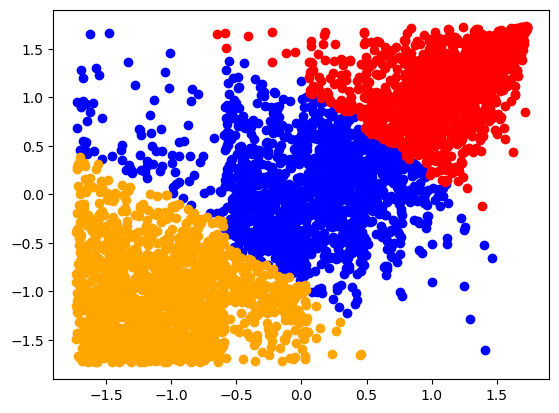

In [77]:
plt.scatter(
cluster2_ss.loc[cluster2_ss['Cluster'] == 0]['Invoice'],
cluster2_ss.loc[cluster2_ss['Cluster'] == 0]['Total'],
c='blue'
)
plt.scatter(
cluster2_ss.loc[cluster2_ss['Cluster'] == 1]['Invoice'],
cluster2_ss.loc[cluster2_ss['Cluster'] == 1]['Total'],
c='red'
)
plt.scatter(
cluster2_ss.loc[cluster2_ss['Cluster'] == 2]['Invoice'],
cluster2_ss.loc[cluster2_ss['Cluster'] == 2]['Total'],
c='orange'
)

The second model performed much better than the first, as it correctly segmented consumers. At the end of the notebook I will explain the 3 clusters criterion.

#### 3 - Third test: Inertia values.

In [115]:
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [118]:
inertia = kmeans_inertia(num_clusters, cluster2_ss)
inertia

[5371.820799082605,
 2211.0708851388113,
 1865.581999726517,
 1543.1908045590917,
 1238.876071388855,
 1048.8965609552329,
 876.8385743756478,
 809.0183722031762,
 749.3752797699401]

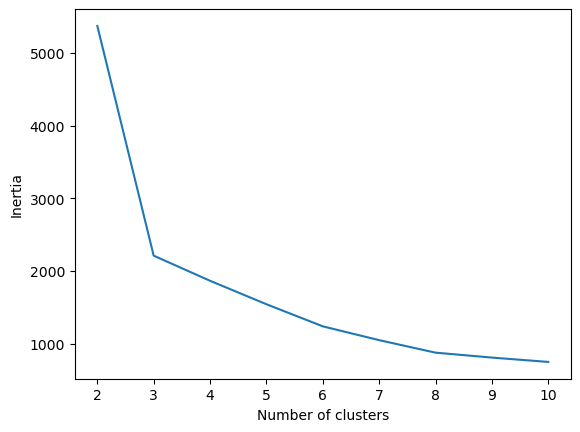

In [119]:
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

The inertia point demonstrates that after 3 clusters, the value drops little, but the selection criterion of 3 is due to business rather than the algorithm.

### Final Report

For online retail marketing, it is important to segment consumers to better reach your strategy. This segmentation into 3 types of consumers is common:

1) High-value consumers: in our graph they are shown in red, loyal to the business, buy frequently and at high prices. It is important to invest in them so as not to lose them.

2) Consumers in the median range: they are in blue on the graph, they buy cheaper products or less frequently than the previous segment, they are important for the business, but less loyal than those with high values. A marketing strategy is essential for them to become high-value consumers.

3) Low-value consumers: they buy with low frequency and are easily co-opted by the competition. Marketing strategy is important for better value products and promotions or for them to become loyal to the company.